In [2]:
import numpy as np

#Create table
from prettytable import PrettyTable

#Read csv
import pandas as pd

#Gegnerate ROC curve graph
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [15]:
##Confronto tra final_test_naive_bayes e test_target
##Confronto tra final_test_our_nb e test_target
##Confronto tra target_r e test_target

data_naive = pd.read_csv("./csv/final_test_naive_bayes.csv")
data_our_nb = pd.read_csv("./csv/final_test_our_nb.csv")
data_views_target_r_sentimental = pd.read_csv("./csv/views_target_r_sentiment.csv")
data_views_target_r = pd.read_csv("./csv/views_target_r.csv")
data_test_target = pd.read_csv("./csv/test_target.csv")
data_test_target_sentimental = pd.read_csv("./csv/test_target_sentimental.csv")


##Colonne target dei tre file csv  
column_naive = data_naive['target'].values
column_our_nb = data_our_nb['target'].values
column_views_target_r = data_views_target_r['target'].values
column_test_target = data_test_target['target'].values
column_test_target_sentimental=data_test_target_sentimental['target'].values
#colonna delle probabilita in R con assunzione
column_probs_target_r=data_views_target_r['probGood'].values
#colonna delle probabilità in R con sentimental analysis 
column_probs_target_r_sentimental=data_views_target_r_sentimental['probGood'].values

column_test = []
binary_naive = []
binary_our_nb = []
binary_views_target_r = []
binary_test = []
binary_test_sentimental=[]

for i in range(len(column_test_target)):
    column_test.append(column_test_target[i][1:])
    
    if column_naive[i] == "good":
        binary_naive.append(1)
    else:
        binary_naive.append(0)
    
    if column_our_nb[i] == "good":
        binary_our_nb.append(1)
    else:
        binary_our_nb.append(0)

    if column_views_target_r[i] == "good":
        binary_views_target_r.append(1)
    else:
        binary_views_target_r.append(0)

    if column_test_target[i] == " good":
        binary_test.append(1)
        
    else:
        binary_test.append(0)
    if column_test_target_sentimental[i] == "good":
        binary_test_sentimental.append(1)
        
    else:
        binary_test_sentimental.append(0)
    
#print(column_naive)
#print(column_our_nb)
#print(column_views_target_r)
#print(column_test)

In [64]:
##Funzione per generare la matrice di confusione date le colonne target
def create_confusion_matrix(predicted, testing):
    
    true_positive = 0
    false_negative = 0
    false_positive = 0
    true_negative = 0
    i = 0
    
    for i in range(len(predicted)):
        
        if testing[i] == " good" and predicted[i] == "good":
            true_positive += 1
            
        elif testing[i] == " good" and predicted[i] == "bad":
            false_negative += 1
            
        elif testing[i] == " bad" and predicted[i] == "good":
            false_positive += 1
            
        elif testing[i] == " bad" and predicted[i] == "bad":
            true_negative += 1

    #print(true_positive)
    #print(false_negative)
    #print(false_positive)
    #print(true_negative)
    
    return true_positive, false_negative, false_positive, true_negative

In [65]:
##Funzione per calcolare accuracy, precision, recall, f-measure, specificity e roc curve 

def performance_unit(confusion_matrix, binary):
    
    true_positive = confusion_matrix[0]
    false_negative = confusion_matrix[1]
    false_positive = confusion_matrix[2]
    true_negative = confusion_matrix[3]
    
    #print(true_positive)
    #print(false_negative)
    #print(false_positive)
    #print(true_negative)
    
    accuracy = (float)(true_positive + true_negative) / (float)(true_positive + false_negative + false_positive + true_negative)
    precision = (float)(true_positive) / (float)(true_positive + false_positive)
    recall = (float)(true_positive) / (float)(true_positive + false_negative)
    fmeasure = (float)(2 * precision * recall) / (float)(precision + recall)
    
    ##VIENE UGUALE ALLA F-MEASURE
    specificity = (float)(true_negative) / (float)(true_negative + false_positive)
    FP_rate = (float)(false_positive) / (float)(true_negative + false_positive)
    
    print("Accuracy = " + str(accuracy))
    print("Precision = " + str(precision))
    print("Recall = " + str(recall))
    print("F-measure = " + str(fmeasure))
    print("Specificity = " + str(specificity))
    
    print_roc_curve()
    

In [8]:
##Funzione per grafico ROC-curve ed AUC
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
# roc curve and auc score
from sklearn.datasets import make_classification  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.ensemble import RandomForestClassifier  
from sklearn.model_selection import train_test_split  
from sklearn.metrics import roc_curve  
from sklearn.metrics import roc_auc_score
import csv

def plot_roc_curve(fpr, tpr):  
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [10]:
auc = roc_auc_score(binary_test, column_probs_target_r)  
print('AUC: %.2f' % auc)

AUC: 0.92


In [12]:
fpr, tpr, thresholds = roc_curve(binary_test, column_probs_target_r)  

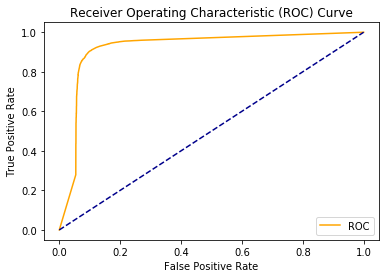

In [16]:
plot_roc_curve(fpr, tpr)

In [18]:
auc = roc_auc_score(binary_test_sentimental, column_probs_target_r_sentimental)  
print('AUC: %.2f' % auc)

AUC: 0.71


In [20]:
fpr, tpr, thresholds = roc_curve(binary_test_sentimental, column_probs_target_r_sentimental)  

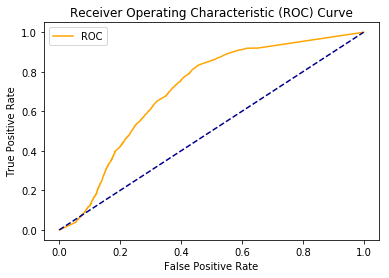

In [21]:
plot_roc_curve(fpr, tpr)

In [91]:
with open('./probs/probs.csv', 'r') as csvfile:
    naive_assun = []
    for row in csv.reader(csvfile, delimiter=';'):
        naive_assun.append(float(row[0]))
naive_assun[1:5]

[0.664363289913,
 1.03805852802e-13,
 0.999804258004,
 4.51751969166e-11,
 1.60748904754e-06,
 1.52988732793e-13,
 4.81281681175e-13,
 0.999999920114,
 0.634946318921,
 0.998822059579,
 0.834269475651,
 0.00232280029622,
 3.42755434124e-06,
 9.90922849031e-06,
 0.000122162720714,
 7.03437308402e-13,
 3.58602036954e-14,
 8.881784197e-16,
 0.247885652727,
 8.881784197e-16,
 2.07180531533e-05,
 8.0190076801e-11,
 9.32587340685e-14,
 3.83953805971e-07,
 0.999925467042,
 8.881784197e-16,
 0.000822396737471,
 0.00821596938812,
 0.880147461155,
 5.82656864723e-06,
 0.0288703021484,
 0.163172280375,
 8.15647216434e-10,
 1.18687282225e-10,
 0.968505930767,
 7.99427191112e-12,
 0.218191546487,
 0.000126845515959,
 0.999407260312,
 0.999999920114,
 0.999939685324,
 0.999999328666,
 0.999996097637,
 0.980970655428,
 0.861427801049,
 0.209249794222,
 0.999868544118,
 0.0155088653508,
 0.999958195828,
 0.999950401646,
 0.998397795536,
 0.987136820391,
 0.999999920114,
 0.999999920114,
 0.99999992011

In [68]:
'''
cm_naive = create_confusion_matrix(column_naive, column_test_target)
cm_our_nb = create_confusion_matrix(column_our_nb, column_test_target)
cm_views_target_r = create_confusion_matrix(column_views_target_r, column_test_target)

performance_unit(cm_naive, binary_naive)
performance_unit(cm_our_nb, binary_our_nb)
performance_unit(cm_views_target_r, binary_views_target_r)
'''

'\ncm_naive = create_confusion_matrix(column_naive, column_test_target)\ncm_our_nb = create_confusion_matrix(column_our_nb, column_test_target)\ncm_views_target_r = create_confusion_matrix(column_views_target_r, column_test_target)\n\nperformance_unit(cm_naive, binary_naive)\nperformance_unit(cm_our_nb, binary_our_nb)\nperformance_unit(cm_views_target_r, binary_views_target_r)\n'

In [72]:
auc = roc_auc_score(binary_test, naive_assun)  
print('AUC: %.2f' % auc)  

AUC: 0.97


In [82]:
fpr, tpr, thresholds = roc_curve(binary_test, naive_assun)  

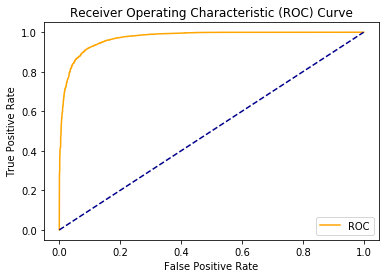

In [83]:
plot_roc_curve(fpr, tpr)  

In [75]:
with open('./probs/probs_mybn.csv', 'r') as csvfile:
    naive_assun = []
    for row in csv.reader(csvfile, delimiter=';'):
        naive_assun.append(float(row[0]))
naive_assun[1:5]

[0.990687823573,
 0.00482160077145,
 0.990687823573,
 0.00482160077145,
 0.0518653321202,
 0.00482160077145,
 0.00482160077145,
 0.990687823573,
 0.926790801791,
 0.990687823573,
 0.990687823573,
 0.926790801791,
 0.0518653321202,
 0.926790801791,
 0.0518653321202,
 0.00482160077145,
 0.00482160077145,
 0.00482160077145,
 0.408214690689,
 0.00482160077145,
 0.0518653321202,
 0.0518653321202,
 0.00482160077145,
 0.0518653321202,
 0.926790801791,
 0.00482160077145,
 0.0518653321202,
 0.0518653321202,
 0.408214690689,
 0.0518653321202,
 0.926790801791,
 0.408214690689,
 0.408214690689,
 0.00482160077145,
 0.926790801791,
 0.00482160077145,
 0.408214690689,
 0.408214690689,
 0.990687823573,
 0.990687823573,
 0.926790801791,
 0.926790801791,
 0.990687823573,
 0.926790801791,
 0.408214690689,
 0.926790801791,
 0.926790801791,
 0.408214690689,
 0.990687823573,
 0.926790801791,
 0.990687823573,
 0.990687823573,
 0.990687823573,
 0.990687823573,
 0.990687823573,
 0.926790801791,
 0.990687823573

In [76]:
auc = roc_auc_score(binary_test, naive_assun)  
print('AUC: %.2f' % auc)  

AUC: 0.94


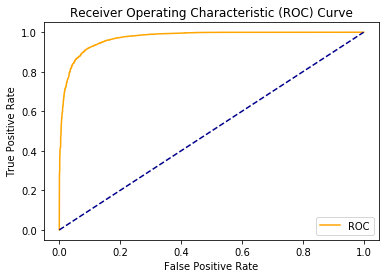

In [84]:
fpr, tpr, thresholds = roc_curve(binary_test, naive_assun)  
plot_roc_curve(fpr, tpr)  

In [78]:
with open('./probs/probs_sent.csv', 'r') as csvfile:
    naive_assun = []
    for row in csv.reader(csvfile, delimiter=';'):
        naive_assun.append(float(row[0]))
naive_assun[1:5]

[0.20063685280457966,
 2.878688639684768e-07,
 0.8426081442301987,
 7.274296986325979e-06,
 0.000588726831329045,
 4.092661721744051e-07,
 8.090250555037315e-07,
 0.9831170008158527,
 0.2696250872070326,
 0.7483727310780395,
 0.3402490015419962,
 0.032610045490661155,
 0.0026018423942621993,
 0.0012196514757664145,
 0.006362325931454915,
 7.463610506297513e-07,
 1.5711279166552572e-07,
 1.8057073947197466e-08,
 0.28889985987592615,
 1.8057073947197466e-08,
 0.003959115483989639,
 5.664482972123075e-06,
 2.3272829652309923e-07,
 0.0005586441632676742,
 0.8933916214677304,
 1.8057073947197466e-08,
 0.025441292136085814,
 0.06835577287322858,
 0.48322592174295875,
 0.002296135803372623,
 0.07688436383709807,
 0.1721423570846452,
 3.0901675681205276e-05,
 1.1555635339943748e-05,
 0.560632366456528,
 3.2792987002538965e-06,
 0.22783779632125267,
 0.015259710439652685,
 0.8254589000846926,
 0.9831170008158527,
 0.912758213509464,
 0.9751313638215968,
 0.9531042322402613,
 0.6433665590887683,

In [87]:
auc = roc_auc_score(binary_test_sentimental, naive_assun)  
print('AUC: %.2f' % auc)  

AUC: 0.77


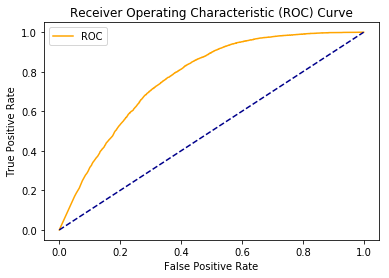

In [89]:
fpr, tpr, thresholds = roc_curve(binary_test_sentimental, naive_assun)  
plot_roc_curve(fpr, tpr)

In [94]:
with open('./probs/probs_mybn_sent.csv', 'r') as csvfile:
    naive_assun = []
    for row in csv.reader(csvfile, delimiter=';'):
        naive_assun.append(float(row[0]))
naive_assun[1:5]

[0.870179461688,
 0.156448643419,
 0.870179461688,
 0.156448643419,
 0.401452792492,
 0.156448643419,
 0.156448643419,
 0.870179461688,
 0.81862957936,
 0.870179461688,
 0.870179461688,
 0.81862957936,
 0.401452792492,
 0.81862957936,
 0.401452792492,
 0.156448643419,
 0.156448643419,
 0.156448643419,
 0.674785442451,
 0.156448643419,
 0.401452792492,
 0.401452792492,
 0.156448643419,
 0.401452792492,
 0.81862957936,
 0.156448643419,
 0.401452792492,
 0.401452792492,
 0.674785442451,
 0.401452792492,
 0.81862957936,
 0.674785442451,
 0.674785442451,
 0.156448643419,
 0.81862957936,
 0.156448643419,
 0.674785442451,
 0.674785442451,
 0.870179461688,
 0.870179461688,
 0.81862957936,
 0.81862957936,
 0.870179461688,
 0.81862957936,
 0.674785442451,
 0.81862957936,
 0.81862957936,
 0.674785442451,
 0.870179461688,
 0.81862957936,
 0.870179461688,
 0.870179461688,
 0.870179461688,
 0.870179461688,
 0.870179461688,
 0.81862957936,
 0.870179461688,
 0.870179461688,
 0.870179461688,
 0.8186295

In [95]:
auc = roc_auc_score(binary_test_sentimental, naive_assun)  
print('AUC: %.2f' % auc)  

AUC: 0.74


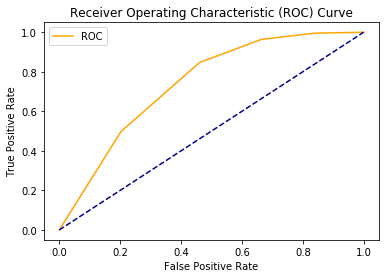

In [96]:
fpr, tpr, thresholds = roc_curve(binary_test_sentimental, naive_assun)  
plot_roc_curve(fpr, tpr)